In [1]:
import gensim
import numpy as np
import os
import sys

ROOT = os.path.dirname(os.getcwd())
path_data = 'C:\\Users\\Gosia\\Desktop\\'
sys.path.insert(0, ROOT)

sys.path.append('C:\\Users\\Gosia\\Desktop\\FDR-Metabolomics\\src\\')

In [2]:
import passatutto_parser as pp
from matchms.importing.load_from_json import as_spectrum


pre_spectrums_query = pp.PassatuttoParser(r'C:\\Users\\Gosia\\Desktop\\MassbankOrbi').parse_folder()
pre_spectrums_lib = pp.PassatuttoParser('C:\\Users\\Gosia\\Desktop\\Gnps').parse_folder()

# Using MatchMS to create spectra for both
spectrums_query = []
for i, s in enumerate( pre_spectrums_query ):
    spectrums_query.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        
spectrums_lib = []
for i, s in enumerate( pre_spectrums_lib ):
    spectrums_lib.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        

processed 100 files
processed 200 files
processed 300 files
processed 400 files
Finished parsing of 458 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
processed 4100 files
Finished parsing of 4138 spectra 
p

In [3]:
# Loading the decoy database
pre_spectrums_decoys_cond = pp.DecoyParserPassattuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyConditionalPeaks').parse_folder()
pre_spectrums_decoys_rand = pp.DecoyParserPassattuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyRandomPeaks').parse_folder()

# Using MatchMS to create decoy spectra
decoys_cond = []
for i, s in enumerate( pre_spectrums_decoys_cond ):
    decoys_cond.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d'% i)

decoys_rand = []
for i, s in enumerate( pre_spectrums_decoys_rand ):
    decoys_rand.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d'% i)

processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
processed 4100 files
Finished parsing of 4138 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 

In [4]:
from matchms.filtering import normalize_intensities
# Spec2Vec trained model requires normalizing
spectrums_query = [normalize_intensities(s) for s in spectrums_query]
spectrums_lib = [normalize_intensities(s) for s in spectrums_lib]

decoys_cond = [normalize_intensities(s) for s in decoys_cond]
decoys_rand = [normalize_intensities(s) for s in decoys_rand]


Load pretrained spec2vec model

In [5]:
path_models = os.path.join(path_data, "trained_models_1")
model_file = os.path.join(path_models, "spec2vec_size_170.model")

model = gensim.models.Word2Vec.load(model_file)
print(model_file)

C:\Users\Gosia\Desktop\trained_models_1\spec2vec_size_170.model


Create spectrum "documents"

In [6]:
from spec2vec import Spec2Vec
from spec2vec import SpectrumDocument

documents_query = [SpectrumDocument(s, n_decimals=2) for s in spectrums_query]
documents_lib = [SpectrumDocument(s, n_decimals=2) for s in spectrums_lib]

documents_decoys_cond = [SpectrumDocument(s, n_decimals=2) for s in decoys_cond]
documents_decoys_rand = [SpectrumDocument(s, n_decimals=2) for s in decoys_rand]


Derive embeddings

In [7]:
from tqdm.notebook import tqdm  # optional, just to get a progress bar
from spec2vec.vector_operations import calc_vector


intensity_weighting_power = 0.5
allowed_missing_percentage = 70 # specify the maximum (weighted) fraction of the spectrum that is allowed to be missing

vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_query = np.zeros((len(documents_query), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_query)):
    embeddings_spec2vec_query[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_lib = np.zeros((len(documents_lib), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_lib)):
    embeddings_spec2vec_lib[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Embedding vector size: 170


Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.32%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.03%.



Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.16%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 1 word(s) missing in the model.

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 3 word(s) missing in the model.

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.40%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.13%.
Found 2 word(s) missing in the model.

Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.65%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.87%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.00%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.85%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.03%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.
Found 57 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.89%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.71%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.66%.
Found 119 word(s) missing

Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.92%.
Found 57 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.96%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.44%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.76%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.04%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.46%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.53%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.83%.
Found 29 word(s) missing in the

Found 405 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.56%.
Found 91 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.41%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.18%.
Found 1482 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.51%.
Found 322 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.87%.
Found 1391 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.23%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.26%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 289 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.13%.
Found 282 word(s

Found 561 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.33%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.97%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.80%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.28%.
Found 806 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.07%.
Found 600 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.18%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.55%.
Found 16 word(s) missing 

Found 290 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.35%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.63%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.17%.
Found 397 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.03%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.35%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.78%.
Found 130 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.22%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.84%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.94%.
Found 41 word(s) missi

Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.43%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.09%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.51%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.93%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.23%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.83%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.24%.
Found 39 word(s) missing in 

Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.93%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.98%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.87%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.09%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.85%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.05%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.37%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.24%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.73%.
Found 6 word(s) missing in t

Found 54 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.50%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.05%.
Found 126 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.19%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.52%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.93%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.22%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.47%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.18%.
Found 934 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.10%.
Found 143 word(s) miss

Found 742 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.53%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.44%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.69%.
Found 90 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.61%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.29%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.69%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.40%.
Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.60%.
Found 357 word(s) m

Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.27%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.53%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.97%.
Found 328 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.55%.
Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.93%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.09%.
Found 255 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.41%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.47%.
Found 255 word(s) missing

Found 239 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.38%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.99%.
Found 79 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.92%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.16%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.27%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.83%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.
Found 98 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.60%.
Found 67 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.74%.
Found 11 word(s) missing i

Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.57%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.60%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.66%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.99%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.92%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.59%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.95%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.41%.
Found 8 word(s) missing in

Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.86%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.83%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.63%.
Found 223 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.64%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.81%.
Found 308 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.12%.
Found 494 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.78%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.36%.
Found 838 word(s) 

Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.61%.
Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.68%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.50%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.36%.
Found 432 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.59%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 72 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.85%.
Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.34%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.53%.
Found 138 word(s) m

Found 3134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.83%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.83%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.26%.
Found 177 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.66%.
Found 742 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.50%.
Found 388 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 482 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.76%.
Found 218 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.69%.
Found 211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.33%.
Found 12 word

Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.42%.
Found 580 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.67%.
Found 2320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 354 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.47%.
Found 247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.27%.
Found 208 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.68%.
Found 193 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.56%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.64%.
Found 279 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.04%.
Found 245 w

Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.93%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.49%.
Found 1463 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.49%.
Found 445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.41%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.17%.
Found 188 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.91%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.16%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.10%.
Found 290 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.73%.
Found 374 word(s

Found 1820 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.72%.
Found 183 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.94%.
Found 1244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.12%.
Found 302 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.48%.
Found 213 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.86%.
Found 118 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.54%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.01%.
Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.18%.
Found 1014 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.81%.
Found 277

Found 1244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.01%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 302 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.76%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.03%.
Found 285 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.83%.
Found 863 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.13%.
Found 462 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.67%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.74%.
Found 77 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.47%.
Found 497 word(

Found 380 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.38%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.19%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.08%.
Found 369 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.45%.
Found 481 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.15%.
Found 404 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.44%.
Found 534 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.87%.
Found 559 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.30%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 684 word(s) 

Found 485 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.37%.
Found 246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.03%.
Found 308 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.52%.
Found 280 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.68%.
Found 501 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.66%.
Found 495 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.21%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.61%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.71%.
Found 99 word(s

Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.52%.
Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.44%.
Found 405 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.60%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 186 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.34%.
Found 190 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.38%.
Found 70 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.06%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.33%.
Found 1224 word(

Found 1540 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.71%.
Found 281 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.01%.
Found 287 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.88%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.88%.
Found 545 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.54%.
Found 836 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.78%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.26%.
Found 467 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.81%.
Found 812 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.33%.
Found 601

Found 127 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.97%.
Found 394 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.48%.
Found 188 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.77%.
Found 145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.75%.
Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.10%.
Found 200 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.04%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.34%.
Found 925 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 55.71%.
Found 2582 word

Found 779 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.91%.
Found 93 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.12%.
Found 298 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.06%.
Found 157 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.87%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.23%.
Found 342 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.45%.
Found 313 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.06%.
Found 278 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.18%.
Found 277 word(s)

Found 198 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.26%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.77%.
Found 275 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.00%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.50%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.57%.
Found 1594 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.25%.
Found 339 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.14%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.61%.
Found 94 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.59%.
Found 251 word(s

Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.74%.
Found 354 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.21%.
Found 491 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.90%.
Found 149 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.07%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.23%.
Found 106 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.87%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.65%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.87%.
Found 344 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.24%.
Found 404 wor

Found 450 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.83%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.33%.
Found 151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.40%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.80%.
Found 175 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.22%.
Found 661 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.16%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.99%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.93%.
Found 261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.43%.
Found 160 word(

Found 605 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.37%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.88%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.75%.
Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.18%.
Found 1348 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.39%.
Found 363 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.40%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.17%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.55%.
Found 214 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.43%.
Found 54 word(s) 

Found 705 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.01%.
Found 366 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.96%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.36%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.00%.
Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.36%.
Found 628 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.50%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.35%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.33%.
Found 167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.84%.
Found 260 word

Found 266 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.24%.
Found 211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.20%.
Found 236 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.78%.
Found 163 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.43%.
Found 93 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.63%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 1906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.02%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.74%.
Found 752 word(s)

Found 286 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 358 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.30%.
Found 279 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.47%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.78%.
Found 112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.47%.
Found 780 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.61%.
Found 548 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.92%.
Found 256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 289 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.13%.
Found 100 word(s

Found 111 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.04%.
Found 1096 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.78%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.98%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.31%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.70%.
Found 899 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.46%.
Found 1849 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.46%.
Found 511 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.46%.
Found 396 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.02%.
Found 654 wo

Found 860 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.87%.
Found 1938 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.64%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.66%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.90%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.07%.
Found 320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.25%.
Found 228 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.27%.
Found 496 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.12%.
Found 443 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.39%.
Found 6 word(

Found 373 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.46%.
Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.79%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.94%.
Found 1246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.95%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.94%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.53%.
Found 539 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.12%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.22%.
Found 258 word(s)

Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.57%.
Found 355 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.44%.
Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.07%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.72%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.37%.
Found 2227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.82%.
Found 248 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.08%.
Found 925 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 469 word

Found 556 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.54%.
Found 597 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.24%.
Found 594 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.97%.
Found 239 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.23%.
Found 1330 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 216 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.87%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.15%.
Found 2604 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.51%.
Found 1211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.73%.
Found 11

Found 965 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.43%.
Found 1125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.04%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.95%.
Found 686 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.41%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.27%.
Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.36%.
Found 1017 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.10%.
Found 657 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.44%.
Found 989 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.73%.
Found 273 wo

Found 690 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.35%.
Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.79%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.28%.
Found 715 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.84%.
Found 820 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.08%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.46%.
Found 440 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.28%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.43%.
Found 523 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 726 wor

Found 1770 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.09%.
Found 647 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.94%.
Found 117 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.20%.
Found 720 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.51%.
Found 1389 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.04%.
Found 700 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.82%.
Found 1108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.85%.
Found 426 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.00%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.44%.
Found 671 w

Found 669 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.34%.
Found 220 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.74%.
Found 96 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.04%.
Found 234 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.04%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.69%.
Found 900 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.58%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.15%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.97%.
Found 182 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.85%.
Found 1768 wor

Found 1805 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.43%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.15%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.17%.
Found 891 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.88%.
Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.70%.
Found 127 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.86%.
Found 51 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.05%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.70%.
Found 201 word(s)

Found 209 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.07%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.53%.
Found 496 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.77%.
Found 228 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.61%.
Found 799 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.44%.
Found 770 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.90%.
Found 214 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.20%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.74%.
Found 517 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.17%.
Found 533 word(

Found 422 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.72%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.21%.
Found 331 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.56%.
Found 755 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.52%.
Found 77 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.83%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.73%.



In [8]:


embeddings_spec2vec_decoys_cond = np.zeros((len(documents_decoys_cond), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_decoys_cond)):
    embeddings_spec2vec_decoys_cond[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_decoys_rand = np.zeros((len(documents_decoys_rand), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_decoys_rand)):
    embeddings_spec2vec_decoys_rand[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.01%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 1 word(s) missing in the model.

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.02%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.02%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model.

In [21]:
import importlib
import cosine_calc
importlib.reload(cosine_calc)

<module 'cosine_calc' from 'C:\\Users\\Gosia\\Desktop\\FDR-Metabolomics\\src\\cosine_calc.py'>

In [22]:
from cosine_calc import get_spec2vec_hits

hits = get_spec2vec_hits( documents_query, documents_lib, model, precursor_tol=3,
                            intensity_weighting_power=intensity_weighting_power,
                            allowed_missing_percentage=allowed_missing_percentage, passatutto=True,
                embeddings_query=embeddings_spec2vec_query, embeddings_library=embeddings_spec2vec_lib)

In [23]:
def add_pmz(specs):
    from rdkit.Chem import MolFromSmiles, MolToSmiles, MolFromInchi
    from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcMolFormula
    for s in specs:
        s._obj.set('precursor_mz', s._obj.get('parent_mass', 0))
        
add_pmz(documents_query)

In [24]:
import copy
documents_decoys_cond = []
for v,d in zip(embeddings_spec2vec_decoys_cond,documents_lib):
    decoy_doc = copy.deepcopy(d)
    decoy_doc._obj.set('inchi', 'knockoff')
    decoy_doc._obj.set('inchikey_inchi', 'knockoff')
    decoy_doc._obj.set('vector', v)
    documents_decoys_cond.append(decoy_doc)

hits_decoys_cond = get_spec2vec_hits(documents_query, documents_decoys_cond, decoys=True, model=model, precursor_tol=3, metaKey="precursor_mz",
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True,
                                    embeddings_query=embeddings_spec2vec_query )


documents_decoys_rand = []
for v,d in zip(embeddings_spec2vec_decoys_rand,documents_lib):
    decoy_doc = copy.deepcopy(d)
    decoy_doc._obj.set('inchi', 'knockoff')
    decoy_doc._obj.set('inchikey_inchi', 'knockoff')
    decoy_doc._obj.set('vector', v)
    documents_decoys_rand.append(decoy_doc)

hits_decoys_rand = get_spec2vec_hits(documents_query, documents_decoys_rand, decoys=True, model=model, precursor_tol=3, metaKey="precursor_mz",
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True,
                                    embeddings_query=embeddings_spec2vec_query )

In [25]:
# Calculating true q-value scores
from q_value_calc import calculate_q_value
q_list_true = calculate_q_value(hits)

In [26]:
# Calculating estimated q-value scores
q_list_estimated_cond = calculate_q_value(hits+hits_decoys_cond,True)
q_list_estimated_rand = calculate_q_value(hits+hits_decoys_rand,True)

In [ ]:
from knockoffs import generate_knockoffs

# Good candidate: (110,3)
diags = [110,100,80,50]
q_list_knockoffs = {}
for diag in diags:
    for comp in [3,10,20,30,50]:
        try:
            knockoff_documents = generate_knockoffs(model,documents_lib,allowed_missing_percentage=allowed_missing_percentage,n_components=comp, diagonal_matrix=diag, embeddings=embeddings_spec2vec_lib)
            hits_knockoffs = get_spec2vec_hits(documents_query, knockoff_documents, decoys=True, model=model, precursor_tol=3, metaKey="precursor_mz",
                                                                    intensity_weighting_power=intensity_weighting_power,
                                                                    allowed_missing_percentage=allowed_missing_percentage, passatutto=True, embeddings_query=embeddings_spec2vec_query)
            q_list_knockoffs[(diag, comp)] = calculate_q_value(hits+hits_knockoffs,True)
        except Exception as e:
            print( diag, "failed", e )

Embedding vector size: 170
Embedding vector size: 170
Embedding vector size: 170


C:\Users\Gosia\anaconda3\envs\fdr-metab\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


110 failed Joint covariance matrix has to be positive definite
Embedding vector size: 170
110 failed Joint covariance matrix has to be positive definite
Embedding vector size: 170
110 failed Joint covariance matrix has to be positive definite
Embedding vector size: 170
Embedding vector size: 170


In [ ]:
# plot estimated and true q-values
def combine_true_est(q_val_true,q_val_est):
    res = []
    q_idx = 0
    for q_e, _, score in q_val_est:
        while q_idx < len(q_val_true)-1 and q_val_true[q_idx+1][2] >= score:
            q_idx += 1
        res.append((score, q_val_true[q_idx][0], q_e))
    return res
        
scores_cond, trues_cond, estimateds_cond = zip(*combine_true_est(q_list_true, q_list_estimated_cond))
scores_rand, trues_rand, estimateds_rand = zip(*combine_true_est(q_list_true, q_list_estimated_rand))
to_plot = {'spectrum-based method':(trues_cond,estimateds_cond), 'naive method':(trues_rand,estimateds_rand)}
for k,v in q_list_knockoffs.items():
    to_plot[k] = list(zip(*combine_true_est(q_list_true, v)))[1], list(zip(*combine_true_est(q_list_true, v)))[2]

import plot_q_vals
plot_q_vals.plot_q_vals( to_plot )

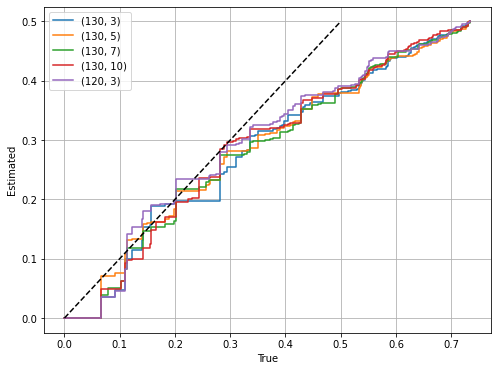

In [18]:
to_plot = {}
for k,v in list(q_list_knockoffs.items())[:5]:
    to_plot[k] = list(zip(*combine_true_est(q_list_true, v)))[1], list(zip(*combine_true_est(q_list_true, v)))[2]
import plot_q_vals
plot_q_vals.plot_q_vals( to_plot )

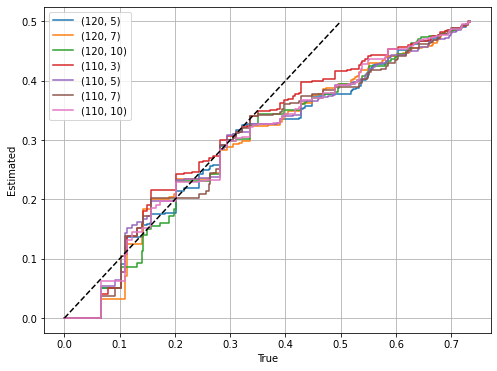

In [19]:
to_plot = {}
for k,v in list(q_list_knockoffs.items())[5:]:
    to_plot[k] = list(zip(*combine_true_est(q_list_true, v)))[1], list(zip(*combine_true_est(q_list_true, v)))[2]
import plot_q_vals
plot_q_vals.plot_q_vals( to_plot )